<a href="https://colab.research.google.com/github/shubhpanchal/EDA--HotelAnalysis-AlmabetterCapstoneProject/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# Importing necessary libraries and data 

# For data manupulation and numeric operations
import numpy as np
import pandas as pd

# Data Vizualisation Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For loading the dataset
from google.colab import drive
drive.mount('/content/drive')

# For ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# loading our hotel data
original_data = pd.read_csv('/content/drive/MyDrive/Almabetter/Alma Capstone Projects Folder/EDA-Hotel Analysis/Copy of Hotel Bookings.csv')
# Lets create a copy of original Dataset and we will work on the copy data.
# Its always better to work on the copy dataset to avaoid accidental loss of data.
hotel = original_data.copy()
hotel.head() # checking if the dataset is loaded successfully or not

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Data Cleaning.
### Checking for duplicate values and dropping them.

In [3]:
# Lets check the shape of the data and then check for duplicate data and remove them if any.
print('The shape of the data is :', hotel.shape)
print('The shape of the duplicated data is :',hotel[hotel.duplicated()].shape)
hotel.drop_duplicates(inplace = True)
print('The shape of the hotel data afet removing duplicate entries is :', hotel.shape)

The shape of the data is : (119390, 32)
The shape of the duplicated data is : (31994, 32)
The shape of the hotel data afet removing duplicate entries is : (87396, 32)


## Understanding Data

In [4]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

From inital data exploration we see that the dataset consists of both numerical and categorical values. There are even some datetime values stored in the form of object category, which we need to change into proper format. Also there are some categorical variables stored in the form of numerical variables.
  The other thing that we see is that there are some missing values. We will explore the data further and treat the columns with missing values appropriately.
* Lets understand what are the columns:-


1.   **ADR**(*Numeric*): Average Daily Rate defined as - Calculated by dividing the sum of all lodging transactions by the total number of staying nights.
2.   **Adults**(*Integer*): Number of adults
3.   **Agent**(*Categorical*): ID of the travel agency that made the bookings.
4.   **ArrivalDateDayOfMonth**(*Integer*): Day of the month of the arrival date.
5.   **ArrivalDateMonth**(*Categorical*): Month of arrival date with 12 categories (January to December).
6.   **ArrivalDateWeekNumber**(*Integer*):Week number of the arrival date.
7.   **ArrivalDateYear**(*Integer*): Year of arrival date.
8. **AssignedRoomType** (*Categorical*): Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
9. **babies** (*Integer*) :Number of babies.
10. **BookingChanges** (*Integer*): Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.Calculated by adding the number of unique iterations that change some of the booking attributes, namely: persons, arrival date,nights, reserved room type or meal.
11. **Children** (*Integer*): Number of children. Sum of both payable and non-payable children.
12. **Company**(*Categorical*): ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.
13. **Country**(*Categorical*): Country of origin.
14. **CustomerType**(*Categorical*):Type of booking, assuming one of four
categories:-
*   Contract - when the booking has an allotment or other type of contract associated to it.
*   Group – when the booking is associated to a group
*   Transient – when the booking is not part of a group or contract, and is not associated to other transient booking.
*   Transient-party – when the booking is transient, but is associated to at least other transient booking.
15. **DaysInWaitingList**(*Integer*):Number of days the booking was in the waiting list before it was confirmed to the customer. Calculated by subtracting the date the booking was confirmed to the customer from the date the booking entered on the PMS.
16. **DepositType**(*Categorical*):  Indication on if the customer made a
deposit to guarantee the booking. This variable can assume three categories:-
* No Deposit – no deposit was made.
* Non Refund – a deposit was made in the value of the total stay cost.
* Refundable – a deposit was made with a value under the total cost of stay.
17. **DistributionChannel**(*Categorical*): Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
18. **IsCanceled**(*Categorical*): Value indicating if the booking was canceled (1) or not (0).
19. **IsRepeatedGuest**(*Categorical*): Value indicating if the booking name was from a repeated guest (1) or not (0).
20. **LeadTime**(*Integer*): Number of days that elapsed between the entering date of the booking into the PMS and the arrival date. Subtraction of the entering date from the arrival date.
21. **MarketSegment**(*Categorical*): Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
22. **Meal**(*Categorical*): Type of meal booked. Categories are presented in standard hospitality meal packages.
* Undefined/SC – no meal package.
* BB – Bed & Breakfast.
* HB – Half board (breakfast and one other meal – usually dinner).
* FB – Full board (breakfast, lunch and dinner)
23. **PreviousBookingsNotCanceled**(*Integer*): Number of previous bookings not cancelled by the customer prior to the current booking.
24. **PreviousCancellations**(*Integer*): Number of previous bookings that were
cancelled by the customer prior to the current booking.
25. **RequiredCardParkingSpaces**(*Integer*): Number of car parking spaces required by the customer.
26. **ReservationStatus**(*Categorical*):Reservation last status, assuming one of three categories:
* Canceled – booking was canceled by the customer.
* Check-Out – customer has checked in but already departed.
* No-Show – customer did not check-in and did inform the hotel of the reason why.
27. **ReservationStatusDate**(*Date*): Date at which the last status was set.
This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.
28. **ReservedRoomType**(*Categorical*): Code of room type reserved. Code is
presented instead of designation for anonymity reasons.
29. **StaysInWeekendNights**(*Integer*): Number of weekend nights (Saturday or
Sunday) the guest stayed or booked to stay at the hotel. Calculated by counting the number of weekend nights from the total number of nights.
30. **StaysInWeekNights**(*Integer*): Number of week nights (Monday to Friday the guest stayed or booked to stay at the hotel. Calculated by counting the number of week nights from the total number of nights.
31. **TotalOfSpecialRequests**(*Integer*): Number of special requests made by the customer (e.g. twin bed or high floor). Sum of all special requests.

The information about the columns of the dataset was found from the following link:
[Hotel Dataset Columns Information](https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0040)










In [5]:
# Lets create a column by combining day, month and year column to create a new columns 'arrival_date'
from datetime import datetime as dt
hotel['arrival_date'] = hotel['arrival_date_year'].astype('str') + hotel['arrival_date_month'] + hotel['arrival_date_day_of_month'].astype('str')
hotel['arrival_date'] = hotel['arrival_date'].apply(lambda x : dt.strptime(x,'%Y%B%d'))

In [6]:
# Lets calculate length of stay by adding stays_in_weekend_nights and stays_in_week_nights, with that we can compute revenue by multiplying revenue to length of stay.
hotel['length_of_stay'] = hotel['stays_in_weekend_nights'] + hotel['stays_in_week_nights']
hotel['revenue'] = hotel['adr'] * hotel['length_of_stay']

### Dealing with Missing values

In [7]:
# Checking for Missing Values
pd.concat([hotel.isnull().sum(),round(100*(hotel.isnull().sum()/len(hotel)),2)], axis=1, keys=['Missing Values', '% Missing Values'])

,Missing Values,% Missing Values
hotel,0,0.00
is_canceled,0,0.00
lead_time,0,0.00
arrival_date_year,0,0.00
arrival_date_month,0,0.00
arrival_date_week_number,0,0.00
arrival_date_day_of_month,0,0.00
stays_in_weekend_nights,0,0.00
stays_in_week_nights,0,0.00
adults,0,0.00


We see that column 'company' have really high number of missing values, 94%. As the portion of missing data is too large its better to drop the column. Also there are some other columns that have missing values so lets check those too and treat them accordingly.

In [8]:
# Sorting the null values in a descending manner
hotel.isnull().sum().sort_values(ascending = False)[:5]

company     82137
agent       12193
country       452
children        4
hotel           0
dtype: int64

In [9]:
# Dropping the company columns and verifying it
hotel.drop(hotel[['company']], axis=1, inplace=True)
'company' in hotel.columns

False

The 'False' represents that we have successfully dropped the company column.

In [10]:
#  Lets treat the missing values in agent column
hotel['agent'] = hotel['agent'].astype('str') # Changing the datatype as its a categorical data.
hotel['agent'] = hotel['agent'].fillna('0') # Imputing 0 to represent that the bookings were not done through any agent.
print('The missing values in agent columns are : ',hotel['agent'].isnull().sum())
print('The dtype of agent column is : ', hotel['agent'].dtype)

The missing values in agent columns are :  0
The dtype of agent column is :  object


We have successfully dealt with the missing values in agent columns. We imputed '0' to represent that the bookings were not done through any agent.

In [11]:
# Lets treat the missing values in childrens column
hotel['children'] = hotel['children'].fillna(hotel['children'].median())
hotel['children'] = hotel['children'].astype('int')
print('The Missing Values in children column are : ', hotel['children'].isnull().sum())
print('The dtype of children column is : ', hotel['children'].dtype)

The Missing Values in children column are :  0
The dtype of children column is :  int64


We have changed the dtype of children column as float is used to represent fractions and childrens cannot be in fractions.

In [12]:
# Lets treat the missing values in country column
hotel['country'] = hotel['country'].fillna('OTH')
print('The missing values in country column are : ', hotel['country'].isnull().sum())

The missing values in country column are :  0


We have imputed "OTH", representing customers from other countries as we do not know the country of origin of these customers.

In [13]:
# Lets check if we still have any column with missing values
hotel.isnull().sum().sort_values(ascending=False)[:5]

hotel                 0
customer_type         0
reserved_room_type    0
assigned_room_type    0
booking_changes       0
dtype: int64

We have successfully treated all the missing values in all columns

## Changing the column types to appropriate column types.

In [14]:
# Changing the numerical columns to categorical columns
change_to_object =  ['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','is_repeated_guest','is_canceled']
for col in change_to_object:
  hotel[col] = hotel[col].astype('str')
  print('Successfully changed the ' + col + ' dtype to :',hotel[col].dtype)

Successfully changed the arrival_date_year dtype to : object
Successfully changed the arrival_date_week_number dtype to : object
Successfully changed the arrival_date_day_of_month dtype to : object
Successfully changed the is_repeated_guest dtype to : object
Successfully changed the is_canceled dtype to : object


We have successfully changed the dtypes of the columns and lets verify it.

In [15]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  object        
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  object        
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  object        
 6   arrival_date_day_of_month       87396 non-null  object        
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  b

Yes, we have successfully dealt with missing values and also changed the dtypes of required columns.

## Defining Numerical and Categorical Columns.

In [16]:
print('Numerical Columns :-')
numerical = hotel.describe().columns
print(numerical)
print('_'*75)
print('Categorical Columns:-')
categorical = hotel.describe(include=['object','category']).columns
print(categorical)
print('_'*75)

Numerical Columns :-
Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'length_of_stay', 'revenue'],
      dtype='object')
___________________________________________________________________________
Categorical Columns:-
Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')
___________________________________________________________________________


## Hotel Analysis

In [17]:
# Defining a function to return the description of Numerical columns
def num_description(df):
  '''
  This Function returns the description of numerical columns for the given DataFrame
  '''
  return df.describe().T
# defining a function to return the description of Categorical columns
def cat_description(df):
  '''
  This function returns the description of categorical columns for the given DataFrame
  '''
  return df.describe(include=['object','category','datetime']).T

In [18]:
# Checking the numerical description of the whole dataset
num_description(hotel)

,count,mean,std,min,25%,50%,75%,max
lead_time,87396.0,79.891368,86.052325,0.00,11.000,49.0,125.0,737.0
stays_in_weekend_nights,87396.0,1.005263,1.031921,0.00,0.000,1.0,2.0,19.0
stays_in_week_nights,87396.0,2.625395,2.053584,0.00,1.000,2.0,4.0,50.0
adults,87396.0,1.875795,0.626500,0.00,2.000,2.0,2.0,55.0
children,87396.0,0.138633,0.455871,0.00,0.000,0.0,0.0,10.0
babies,87396.0,0.010824,0.113597,0.00,0.000,0.0,0.0,10.0
previous_cancellations,87396.0,0.030413,0.369145,0.00,0.000,0.0,0.0,26.0
previous_bookings_not_canceled,87396.0,0.183990,1.731894,0.00,0.000,0.0,0.0,72.0
booking_changes,87396.0,0.271603,0.727245,0.00,0.000,0.0,0.0,21.0
days_in_waiting_list,87396.0,0.749565,10.015731,0.00,0.000,0.0,0.0,391.0


## Inferences from basic describe function


*   The median Lead time for the hotels was observed as 49 days.
*   It is noticed that mostly couples tend to travel without any childrens or babies.
*   It is evident that the customers are the first time visitors.
*   The median ADR was recorded at 98.1 Euros and the median revenue generated by the hotels was 299 EUROS.
*   The median Length was 3 days



In [19]:
# CHecking the categorical description of whole dataset
cat_description(hotel)

,count,unique,top,freq,first,last
hotel,87396,2,City Hotel,53428,NaT,NaT
is_canceled,87396,2,0,63371,NaT,NaT
arrival_date_year,87396,3,2016,42391,NaT,NaT
arrival_date_month,87396,12,August,11257,NaT,NaT
arrival_date_week_number,87396,53,33,2793,NaT,NaT
arrival_date_day_of_month,87396,31,17,3020,NaT,NaT
meal,87396,5,BB,67978,NaT,NaT
country,87396,178,PRT,27453,NaT,NaT
market_segment,87396,8,Online TA,51618,NaT,NaT
distribution_channel,87396,5,TA/TO,69141,NaT,NaT


## Inferences from the basic categorical describe
*   City hotel has higher number of bookings compared to Resort Hotel.
*   Year 2016 has the highest number of bookings.
*   The preferred meal type was BB(Bread and Breakfast)
*   Most of the Customers were from Portugal out of total 178 countries.
*   Online Tour Agents(Online TA) was the preferred market segment for booking among other 7 market segments.
*   Tour Agents/Tour Operators(TA/TO) was the preferred distribution channel for booking among 4 other distribution channel.
*   Preferred Room Type was 'A' Room Type.
*   Customers preferred bookings with 'No Deposits'
*   Agent Code '9' brought in the highest number of bookings and there are total of 334 agents who provide bookings.
*   Transiet customers were the most who did the bookings.
*   Highest number of bookings were seen on Valentines day(14the Feb, 2016)
*   The data has the bookings from the date 1st July, 2015 to 31st Aug, 2017.

## Outlier Analysis for Hotels.

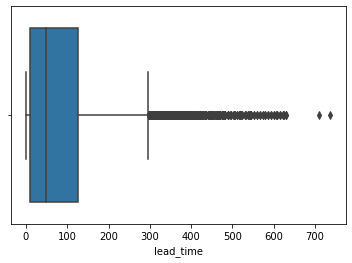

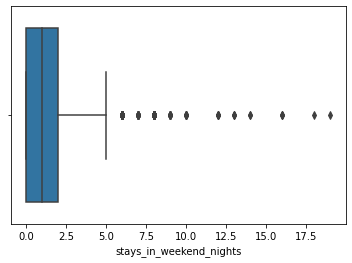

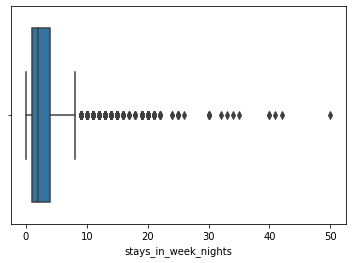

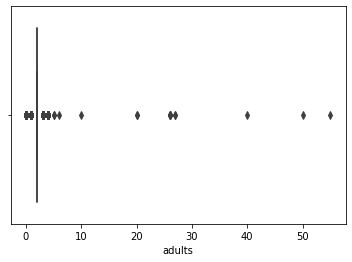

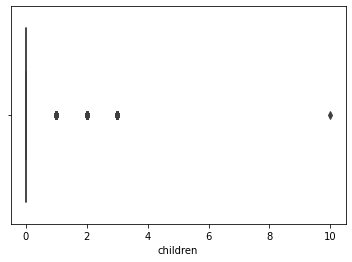

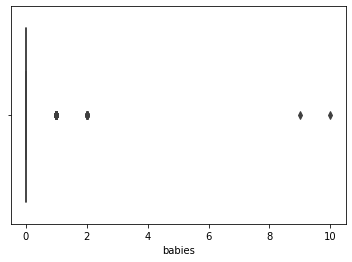

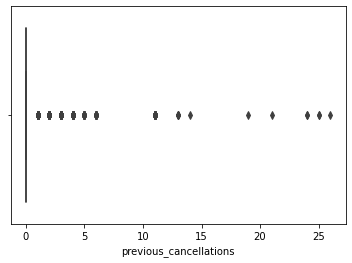

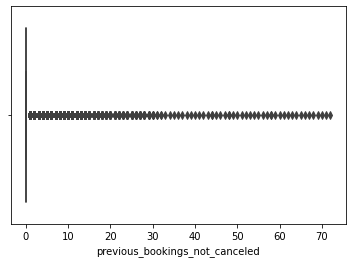

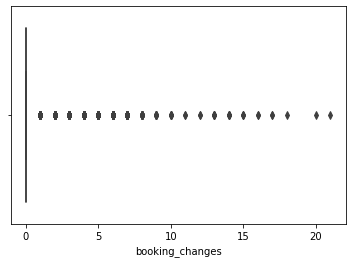

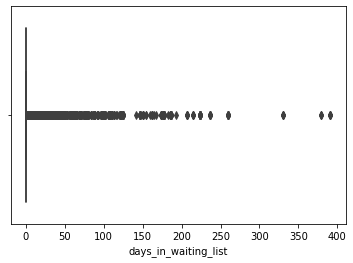

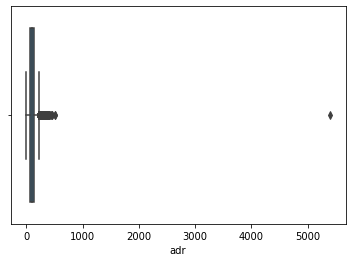

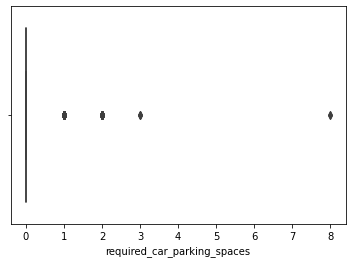

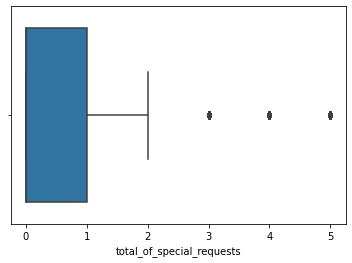

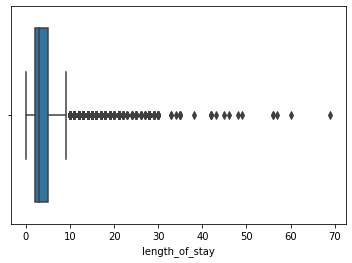

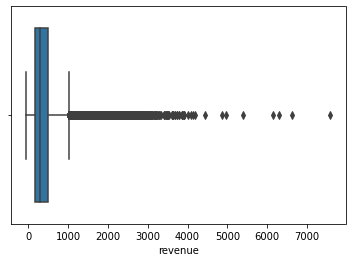

In [20]:
for col in numerical:
  sns.boxplot(x=hotel[col])
  plt.show()

In [21]:
# Outlier treatment
hotel = hotel.loc[hotel['lead_time']<266]
hotel = hotel.loc[hotel['length_of_stay'] <10]
hotel = hotel.loc[hotel['adults']<5]
hotel = hotel.loc[hotel['children']<5]
hotel = hotel.loc[hotel['babies']<5]
hotel = hotel.loc[hotel['required_car_parking_spaces']<5]
hotel = hotel.loc[hotel['adr'] <215]
hotel = hotel.loc[hotel['adr']>50]
hotel = hotel.loc[hotel['revenue']<1000]

In [22]:
hotel.shape

(66252, 34)

# Looking at the Distribution of the Data.
## Univariate Analysis

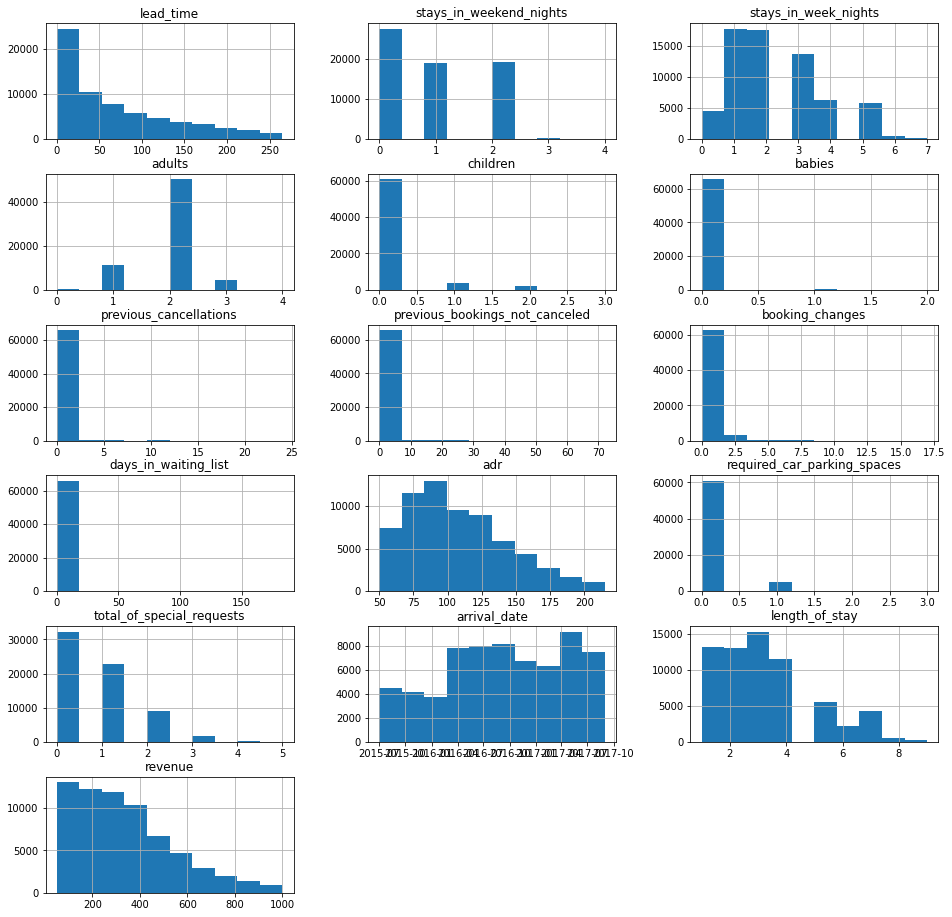

In [23]:
# Checking the distribution of each column type in hotel data
hotel.hist(bins=10, figsize=(16,16), layout = (6,3))
plt.show()

## Inferences
*   It is seen that most of the customers book for hotels a month or 2 before the arrival date.
*   The hypothesis which we got from the basic description stands true that most of the visitors are couples and prefer to travel without children and babies.

# Lets explore the relationship of columns and see how it affects Revenue.
## Bivariate Analysis

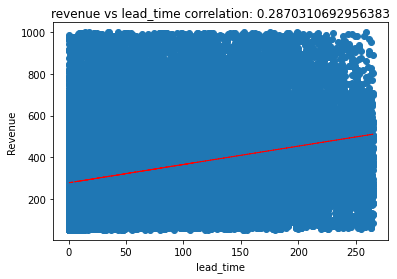

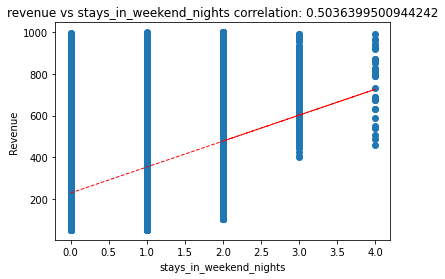

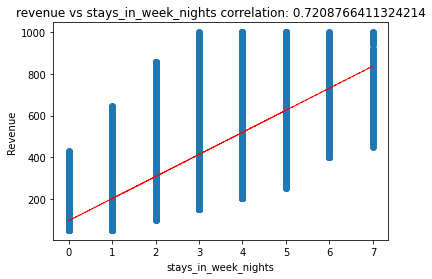

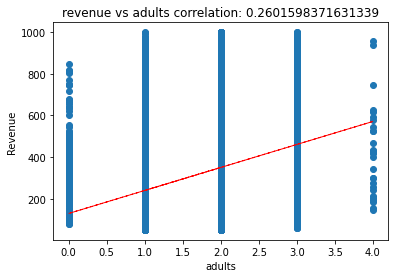

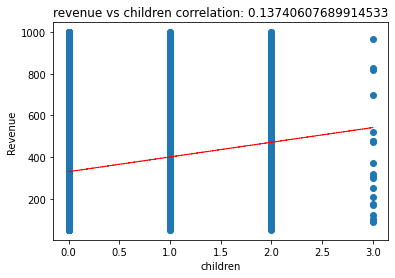

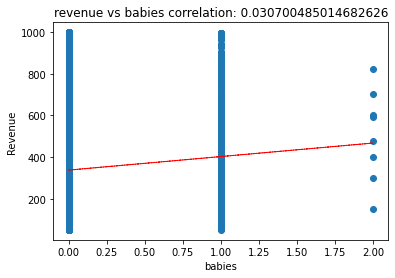

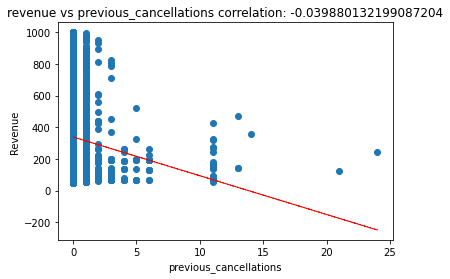

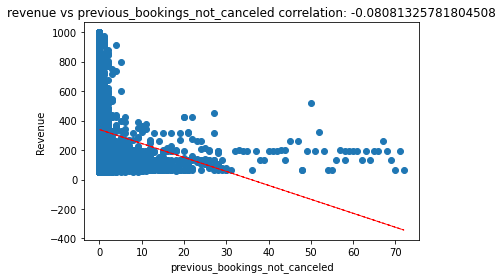

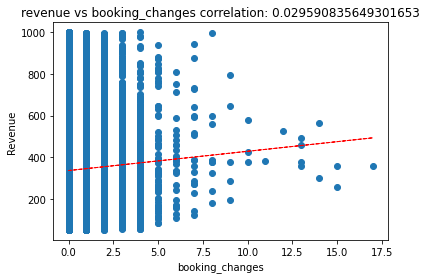

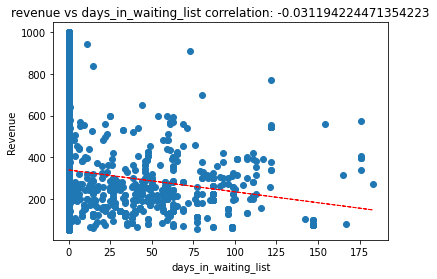

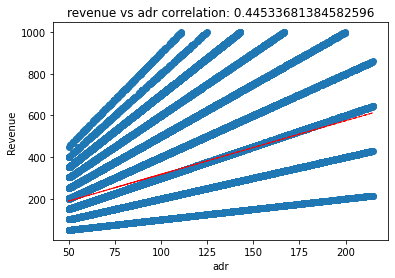

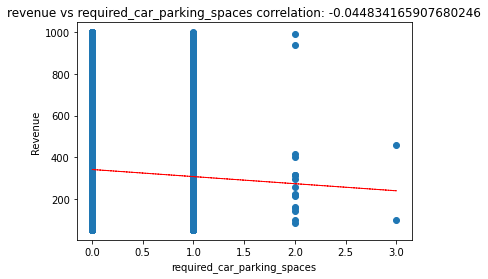

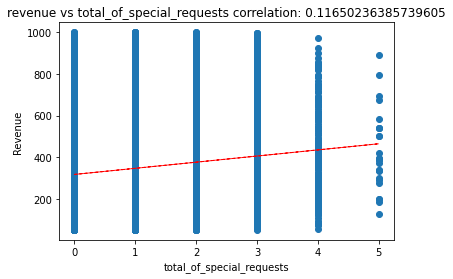

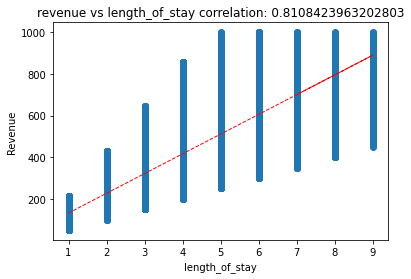

In [24]:
for col in numerical.drop(['revenue']):
  fig = plt.figure(figsize = (6,4))
  ax = fig.gca()
  feature = hotel[col]
  label = hotel['revenue']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y = label)
  plt.xlabel(col)
  plt.ylabel('Revenue')
  ax.set_title('revenue vs ' + col + ' correlation: ' + str(correlation))
  z = np.polyfit(hotel[col], hotel['revenue'],1)
  y_hat = np.poly1d(z)(hotel[col])

  plt.plot(hotel[col], y_hat, 'r--', lw=1)

plt.show()

# Inferences
## From the data it is seen that :-
*   Lead time has almost no effect in determining revenue.
*   stays_in_week_nights has stronger positive correlation with revenue compared to stay_in_weekend_nights.
*   It is seen that higher the adr higher the revenue.
*   It is evedent that the length_of_stay is the ultimate factor that affects the revenue.

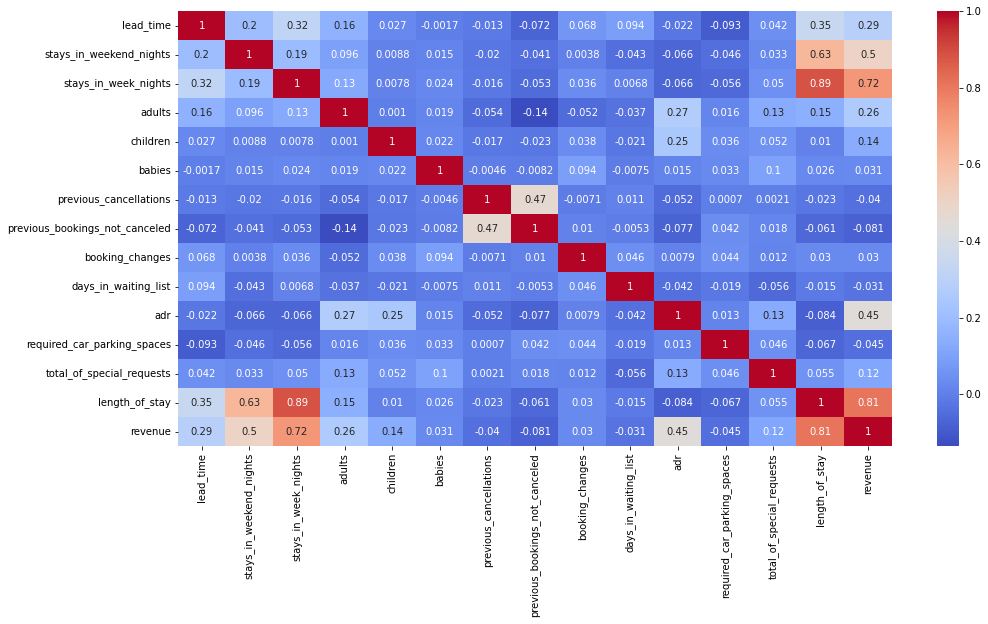

In [25]:
# Plotting the correlation heatmap
plt.figure(figsize = (16,8))
correlation = hotel.corr()
sns.heatmap(correlation, annot=True, cmap ='coolwarm')

# Lets explore categorical Variables

In [26]:
for col in categorical:
  if hotel[col].nunique()<=20:
    print('The count for ' + col + ' is :')
    print(hotel[col].value_counts())
    print('The number of unique values in ' + col + ' are : ', hotel[col].nunique())
    print('_'*75)
    print(' ')
  else:
    print('The unique variables in ' + col + ' are too large')
    print(' ')
    print('_'*75)

The count for hotel is :
City Hotel      47602
Resort Hotel    18650
Name: hotel, dtype: int64
The number of unique values in hotel are :  2
___________________________________________________________________________
 
The count for is_canceled is :
0    48177
1    18075
Name: is_canceled, dtype: int64
The number of unique values in is_canceled are :  2
___________________________________________________________________________
 
The count for arrival_date_year is :
2016    33077
2017    23486
2015     9689
Name: arrival_date_year, dtype: int64
The number of unique values in arrival_date_year are :  3
___________________________________________________________________________
 
The count for arrival_date_month is :
August       7502
July         7267
May          6871
April        6776
June         6358
March        5908
September    5460
October      5330
February     4472
December     3695
November     3460
January      3153
Name: arrival_date_month, dtype: int64
The number of unique

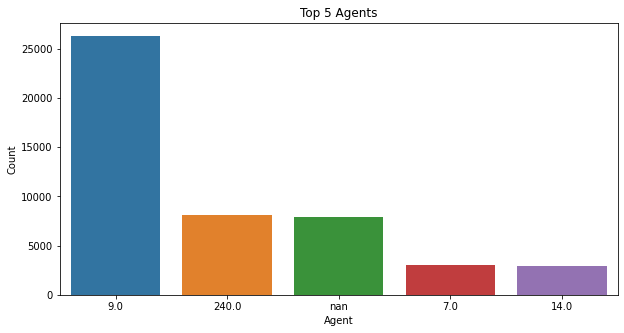

In [27]:
# Lets check the top 5 agents that bring the most bookings
agents_data = hotel['agent'].value_counts().reset_index()
agents_data.rename(columns={'index':'Agent'}, inplace = True)
agents_data.rename(columns={'agent':'Count'}, inplace=True)
plt.figure(figsize=(10,5))
plt.title('Top 5 Agents')
sns.barplot(x= 'Agent', y ='Count', data= agents_data[:5])
plt.show()

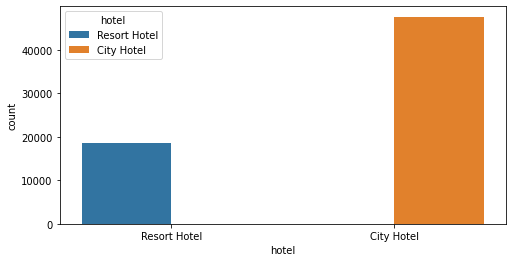

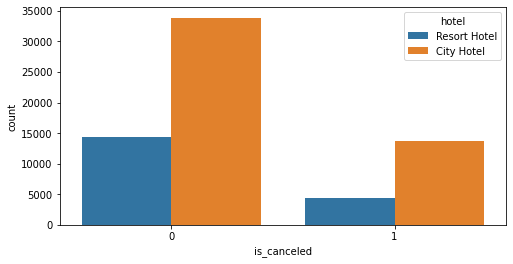

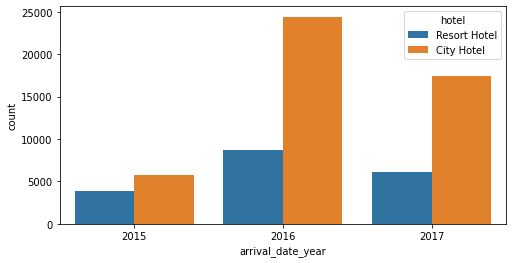

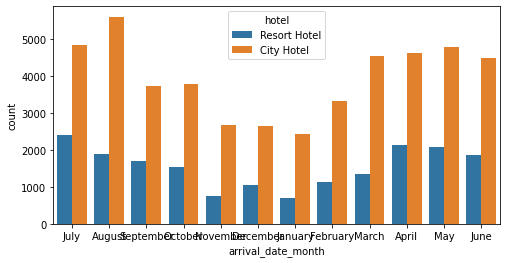

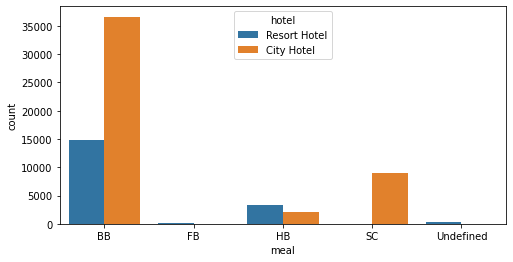

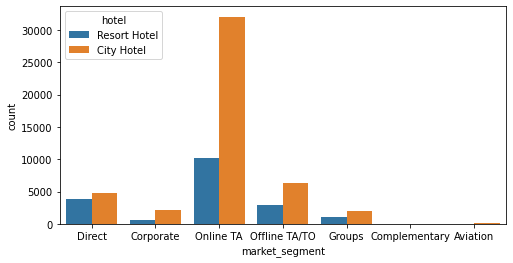

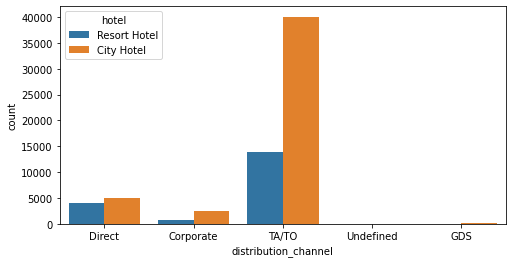

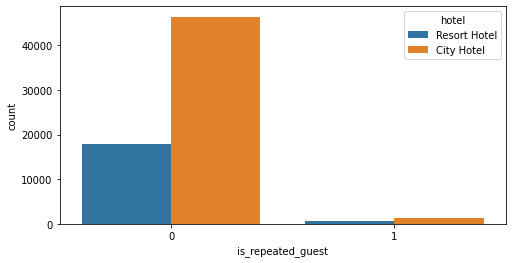

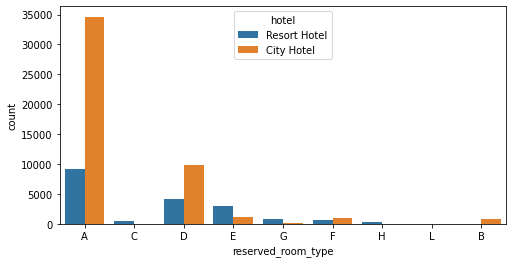

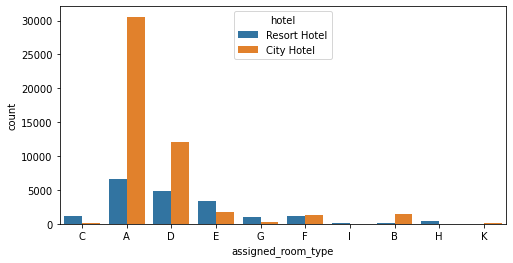

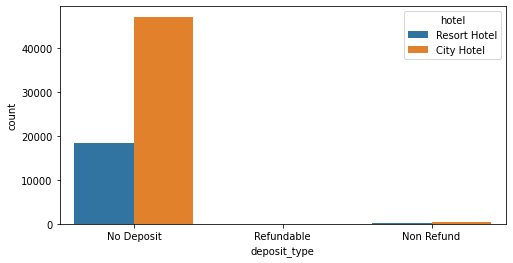

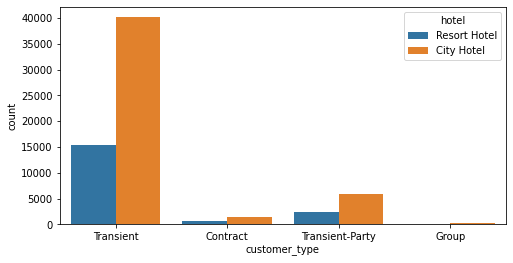

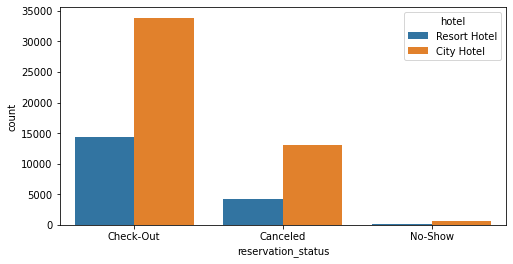

In [29]:
for col in categorical:
    if hotel[col].nunique() <=20:
        plt.figure(figsize =(8,4))
        sns.countplot(hotel[col],hue = hotel['hotel'])
    else:
        pass

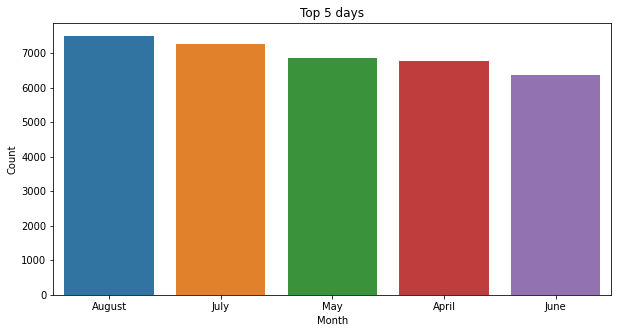

In [30]:
month_data = hotel['arrival_date_month'].value_counts().reset_index()
month_data.rename(columns={'index':'Month'}, inplace = True)
month_data.rename(columns={'arrival_date_month':'Count'}, inplace=True)
plt.figure(figsize=(10,5))
plt.title('Top 5 days')
sns.barplot(x= 'Month', y ='Count', data= month_data[:5])

From the figure we see that the months near the fall of spring performs best.

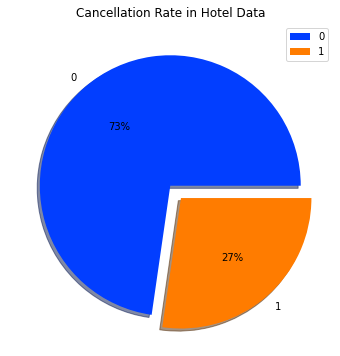

In [31]:
cancellation_df = pd.DataFrame(hotel['is_canceled'].value_counts().reset_index())
cancellation_df.rename(columns={'index':'label'}, inplace =True)
cancellation_df.rename(columns={'is_canceled':'Count'}, inplace=True)
label = cancellation_df['label'].tolist()
count = cancellation_df['Count'].tolist()
explode = [0,0.125]
colors = sns.color_palette('bright')
plt.figure(figsize=(6,6))
plt.pie(count, labels=label, colors=colors, autopct='%.0f%%',explode=explode, shadow=True)
plt.title('Cancellation Rate in Hotel Data')
plt.legend()
plt.show()

We see that there are 27% cancellations in the overall bookings.

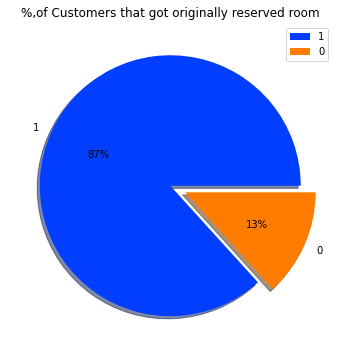

In [32]:
hotel['got_preferred_room'] = np.where((hotel['reserved_room_type']==hotel['assigned_room_type']),1,0)
got_preferred_room = pd.DataFrame(hotel['got_preferred_room'].value_counts().reset_index())
got_preferred_room.rename(columns={'index':'label'}, inplace =True)
got_preferred_room.rename(columns={'got_preferred_room':'Count'}, inplace=True)
room_label = got_preferred_room['label'].tolist()
room_count = got_preferred_room['Count'].tolist()
explode = [0,0.125]
colors = sns.color_palette('bright')
plt.figure(figsize=(6,6))
plt.pie(room_count, labels=room_label, colors=colors, autopct='%.0f%%',explode=explode, shadow=True)
plt.title('%,of Customers that got originally reserved room')
plt.legend()
plt.show()